In [1]:
pwd

'/Users/parksinae/Documents/block/2_quant'

# EU 탄소배출권 가격 예측 모델 개발

### 0. 서론 배경 및 목적

- motiviation
    - 최근 한국 금융시장에 도입된 탄소배출권 ETF의 인기
    - 탄소국경세(CBAM), fit for 55 등 유럽 탄소 규제 강화안 발표
- background
    - 탄소배출권 거래제 이론
    - 전세계 탄소배출권 제도 운영 현황
    - 탄소 관련 금융 상품
    
###  2. 본론1- 관련 금융상품 탐색 및 수익률 분석

- 유럽탄소배출권 선물 및 관련 ETF 8에 대한 기술통계 분석
- 유럽탄소배출권 선물 및 관련 ETF 8에 대한 수익률 분석

###  3. 본론2 - 유럽탄소배출권 선물 가격 예측 모델 개발

- 유럽탄소배출권 선물 가격 예측을 위한 머신러닝/딥러닝 모델 개발

###  4. 결론 결과 및 시사점


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import FinanceDataReader as fdr

# 0. 탄소배출권 관련 데이터 탐색
* 유럽 탄소배출권 선물: 'CFI2Z1'
* 배출권 추종 ETF : 'KRBN', 'KEUA','KCCA'
* Green Funds 추종 대표 ETF : 'GRNB', 'BGRN'
* 탄소중립대표 지수 추종 및 기업 ETF : 'LOWC', 'LCTU' ,'LCTD'
* 국내시장 유럽탄소배출권 선물 추종 대표  ETF: 'kodex_eu'
* 출처:https://carboncredits.com/how-to-invest-in-carbon-credits-carbon-etfs-and-carbon-stocks/


### 0-0 .  데이터 호출

In [4]:
eua = fdr.DataReader('CFI2Z1','2000','2022') # norm
krbn = fdr.DataReader('KRBN','2000','2022') # in
keua = fdr.DataReader('KEUA','2000','2022') # 머신러닝 x : 상장된지 약 2달 
kcca = fdr.DataReader('KCCA','2000','2022') # 머신러닝 x : 상장된지 약 2달
grnb = fdr.DataReader('GRNB','2000','2022') # 거래량적음, 표준편차 적음,
bgrn = fdr.DataReader('BGRN','2000','2022') # in 더 오래되고 비교적 거래량 많음
lowc = fdr.DataReader('LOWC','2000','2022') # 머신러닝 x: 거래량 적음, 오래되었으나
lctu = fdr.DataReader('LCTU','2000','2022') # in 머신러닝 x : 상장된지 약 8개월, 살아나는 중
lctd = fdr.DataReader('LCTD','2000','2022') # 머신러닝 x : 상장된지 약 8개월, 거래량도 적음, 별로임
kodex_eu = fdr.DataReader('400570','2000','2022')

### 0-1. 기술통계분석

In [5]:
carbons= [eua, krbn, keua, kcca, grnb, bgrn, lowc, lctu, lctd, kodex_eu]

In [8]:
cbns = ['eua', 'krbn', 'keua', 'kcca', 'grnb', 'bgrn', 'lowc', 'lctu', 'lctd', 'kodex_eu']

In [ ]:
# 종가 

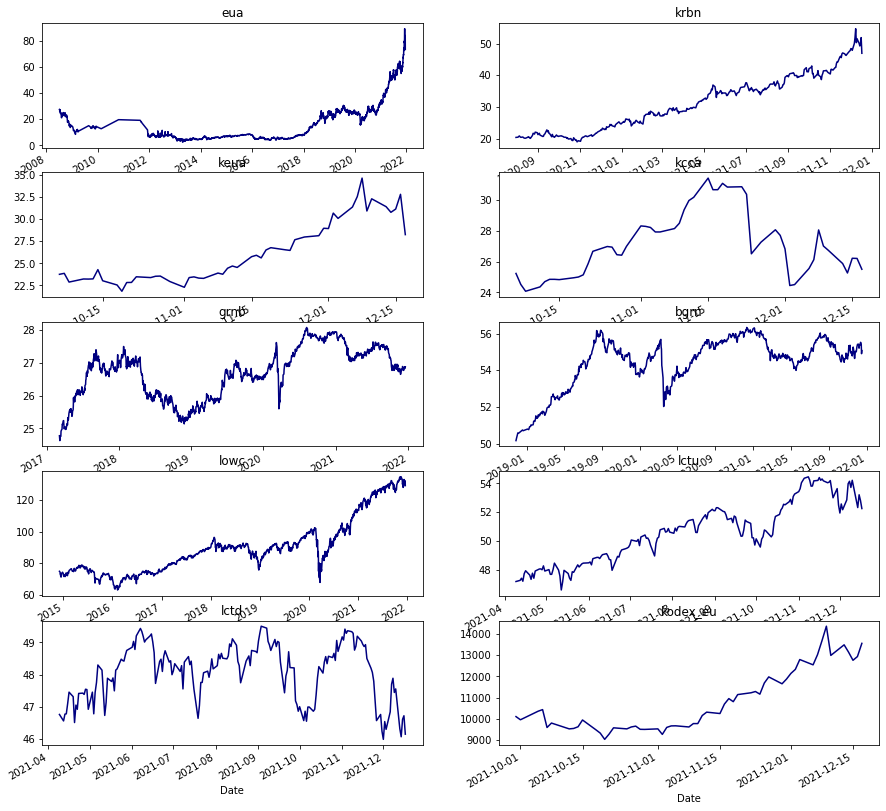

In [84]:
plt.figure(figsize =(15,30))
for i, carbon in enumerate(carbons):
    plt.subplot(10,2,i+1)
    carbon.Close.plot(kind='line', color = 'navy')
    plt.title(cbns[i])
plt.show()
# 종가 전체 시각화

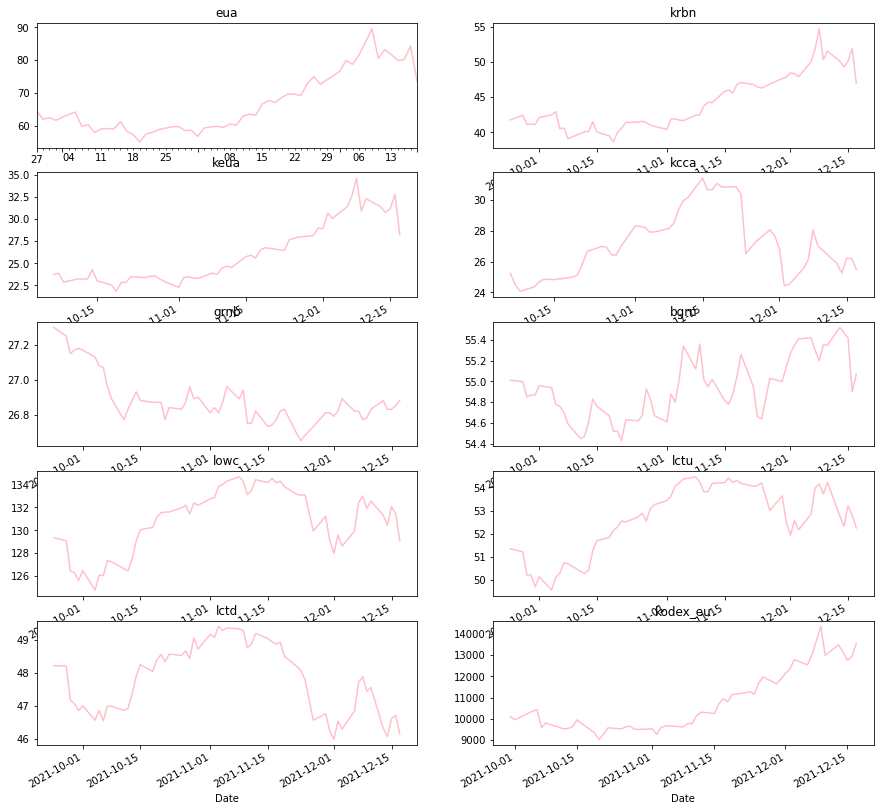

In [86]:
plt.figure(figsize =(15,30))
for i, carbon in enumerate(carbons):
    plt.subplot(10,2,i+1)
    carbon.Close[-60:].plot(kind='line', color='pink')
    plt.title(cbns[i])
plt.show()
# 종가 최근 60일

In [ ]:
# 거래량

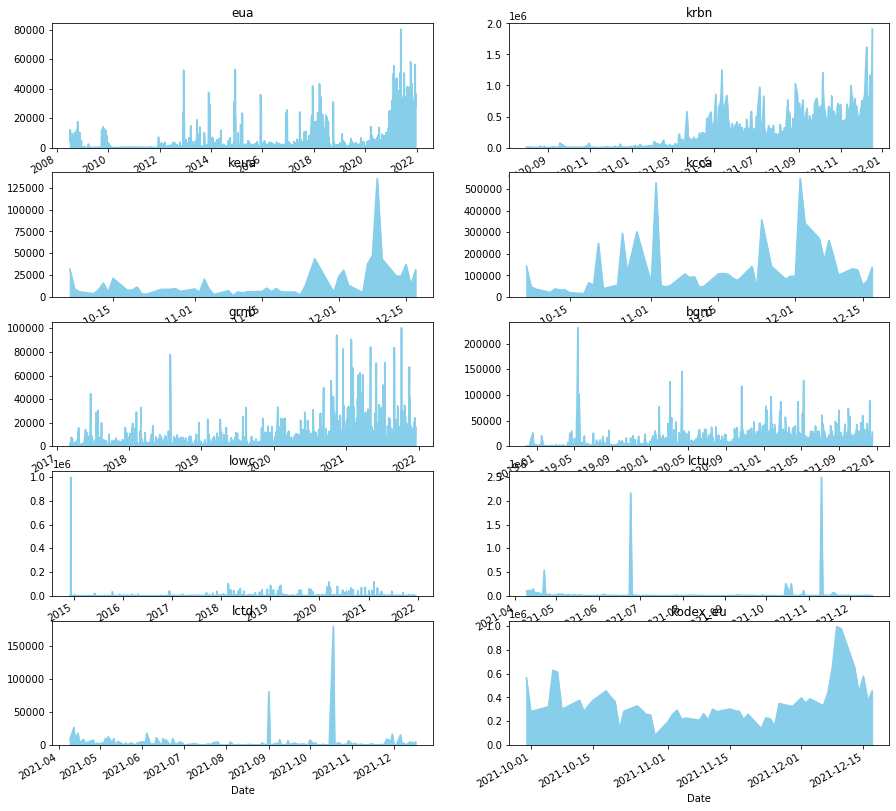

In [83]:
plt.figure(figsize =(15,30))
for i, carbon in enumerate(carbons):
    plt.subplot(10,2,i+1)
    carbon.Volume.plot(kind='area', color ='skyblue')
    plt.title(cbns[i])
plt.show()
# 거래량 전체 시각화

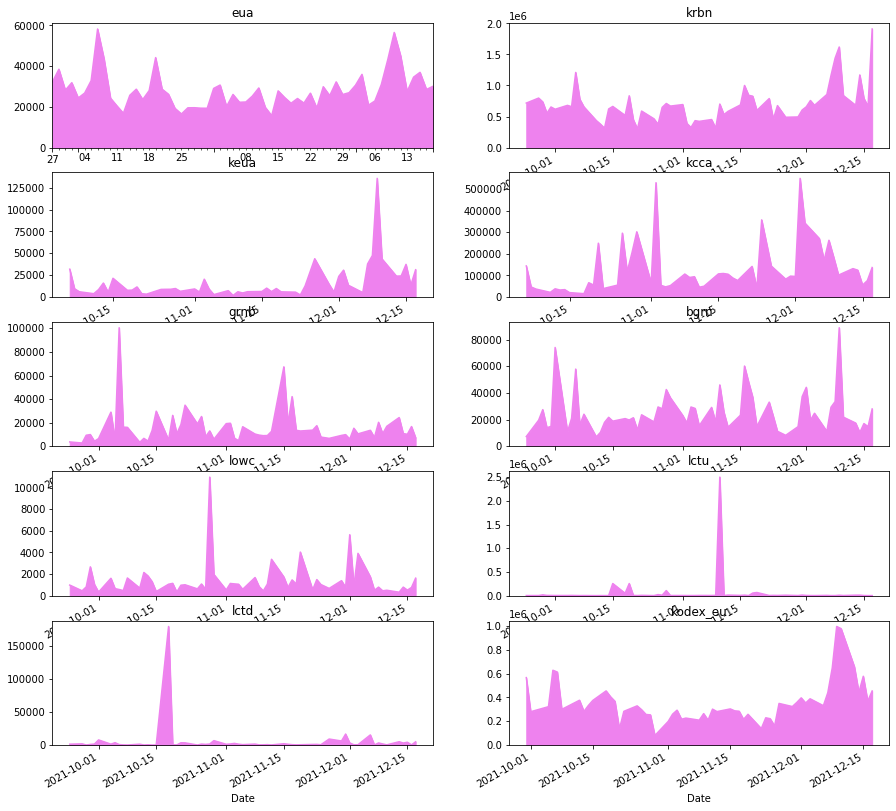

In [82]:
plt.figure(figsize =(15,30))
for i, carbon in enumerate(carbons):
    plt.subplot(10,2,i+1)
    carbon.Volume[-60:].plot(kind='area', color = 'violet')
    plt.title(cbns[i])
plt.show()
# 거래량 최근 60일

In [41]:
# 거래량 평균 바 그래프
avg_vol = {}
for i, carbon in enumerate(carbons):
    avg_vol[cbns[i]]= carbon.Volume.mean()
    
avg_vol60 = {}
for i, carbon in enumerate(carbons):
    avg_vol60[cbns[i]]= carbon.Volume[-60:].mean()

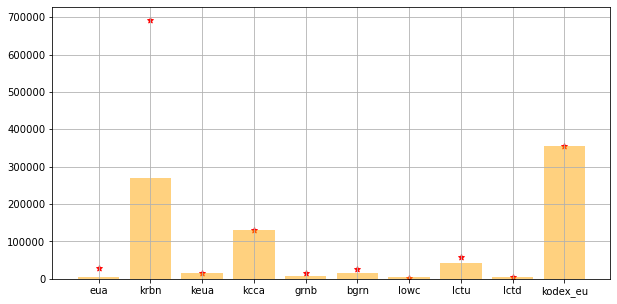

In [183]:
plt.figure(figsize =(10, 5))

plt.bar(avg_vol.keys(), avg_vol.values(), color='orange', alpha=0.5)
plt.scatter(avg_vol60.keys(), avg_vol60.values(), color='red', marker='*', alpha=1)
plt.grid()

In [33]:
for i, carbon in enumerate(carbons):
    print(cbns[i])
    print(carbon.describe().T)
    print('------------------------')

eua
         count         mean          std     min       25%        50%  \
Close   2664.0    16.125465    14.674296   2.700    5.8900    8.15000   
Open    2664.0    16.089587    14.647430   2.710    5.9500    8.20000   
High    2664.0    16.337192    14.945398   2.900    6.0000    8.24500   
Low     2664.0    15.847425    14.378533   2.490    5.8675    8.15000   
Volume  2664.0  5241.250000  9420.571165  10.000  190.0000  970.00000   
Change  2664.0     0.000205     0.048405  -0.413   -0.0153    0.00015   

                75%         max  
Close     24.060000     89.6000  
Open      24.107500     89.7100  
High      24.400000     90.6900  
Low       23.712500     85.0700  
Volume  4737.500000  80530.0000  
Change     0.017625      0.4986  
------------------------
krbn
        count           mean            std       min         25%  \
Close   349.0      31.184585       8.610163   18.9600     22.8500   
Open    349.0      31.214040       8.593399   19.1000     22.9000   
High    3

- grnb, lowc, lctd 평균거래량 1만 이하
- keua, kcca, kodex_eu 는 상장한지 약 2개월밖에 안됨
- grnb, lctd는 표준편차 낮음(변동성 거의 없다는 의미)

### 0-2. 상관관계 분석

<AxesSubplot:>

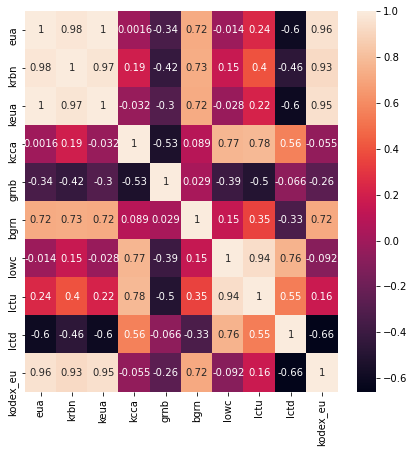

In [35]:
# 최근 종가
close_all = {}
for i, carbon in enumerate(carbons):
    close_all[cbns[i]]= carbon.Close[-60:]

plt.figure(figsize=(7,7))
sns.heatmap(pd.DataFrame(close_all).dropna().corr(), annot=True)

- 유럽탄소배출권선물가격(EUA)
    - 양의 상관관계 : keua(1), krbn(0.98), kodex_eu(0.96), bgrn(0.72)
    - 음의 상관관계 : lctd(-0.6), grnb( -0.34)
- KODEX유럽탄소배출권선물ICD(kodex_eu)
    - 양의 상관관계 : eua(0.96), keua(0.95), krbn(0.93), bgrn(0.74)
    - 음의 상관관계 : lctd(-0.66), grbn(-0.26)
- grnb/bgrn은 둘다 친환경프로젝트 투자 관련 제품이지만 서로 성격 달리함
    - grnb는 eua와 음, bgrn은 양의 상관관계
    - bgrn은 전세계 600여개 친환경프로젝트 투자 관련 인덱스 추종 상품 
    - grnb는 전세계 300여개 친환경프로젝트 중 미화(dollar)로 계상된 투자 인덱스 추종상품
- 캘리포니아 탄소배출권 선물(KCCA)
    - 양의 상관관계 : lctu(0.78),lowc(0.77),lctd(0.56)
    - 음의 상관관계 : grnb(-0.53)
    - EUA(0.0016)으로 유럽탄소배출권과는 패턴 다름

<AxesSubplot:>

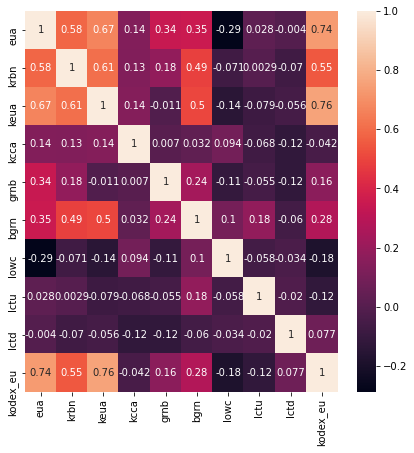

In [36]:
# 최근 거래량
volume_all = {}
for i, carbon in enumerate(carbons):
    volume_all[cbns[i]]= carbon.Volume[-60:]

plt.figure(figsize=(7,7))
sns.heatmap(pd.DataFrame(volume_all).dropna().corr(), annot=True)

- eua
    - 양의 상관관계 : kodex(0.74), keua(0.67), krbn(0.58)
    - 음의 상관관계 : lowc(-29)
- 이외의 상관관계는 종가의 상관과계보다 약함
- kcca는 별도의 거래량패턴 가짐
- 가격결정은 공통성분(eua)에 기원하지만, 각 고객이 상이하여 다른 패턴이 나오는 것으로 추측됨
    - 유럽내 ets대상 배출기업(eua), 미국장(krbn/keua), 한국장(kodex)

# 소결
- EUA 가격은 직접적으로 가격을 추종하는 대상 ETF 금융상품(KEUA, KODex_eu, KRBN)의 가격과 상당히 밀접히 연관되어 있음
    - 기타 친환경 상품 가격과의 상관관계는 어느 정도 존재함
    - 거래량은 가격보다는 상관관계가 낮음
- EUA가격에 대한 예측 모델은 다른 관련 종목의 거래에도 참고될 수 있음

# 1. 대상 etf 상품에 대한 quant 방법을 사용한 기본적인 수익률 계산

### 1-0 일수익률의 정규 분포 확인

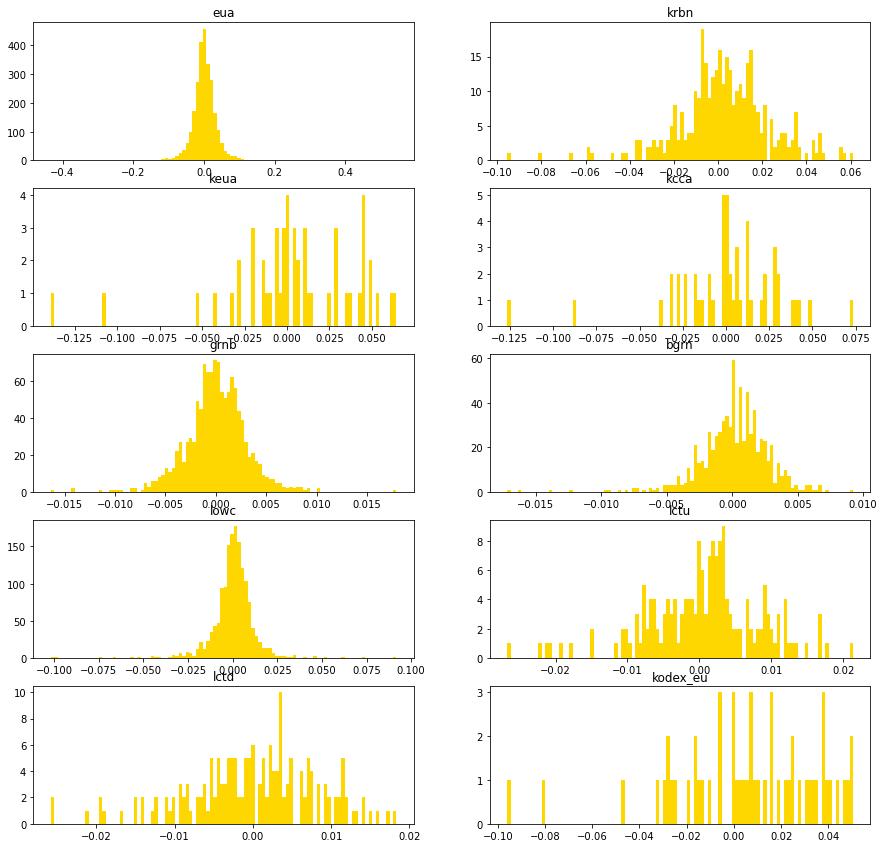

In [89]:
plt.figure(figsize =(15,30))
for i, carbon in enumerate(carbons):
    plt.subplot(10,2,i+1)
    plt.hist(carbon.Close.pct_change(),bins=100, color='gold')
    plt.title(cbns[i])
plt.show()

### 1-1. 일 수익률 패턴 시각화

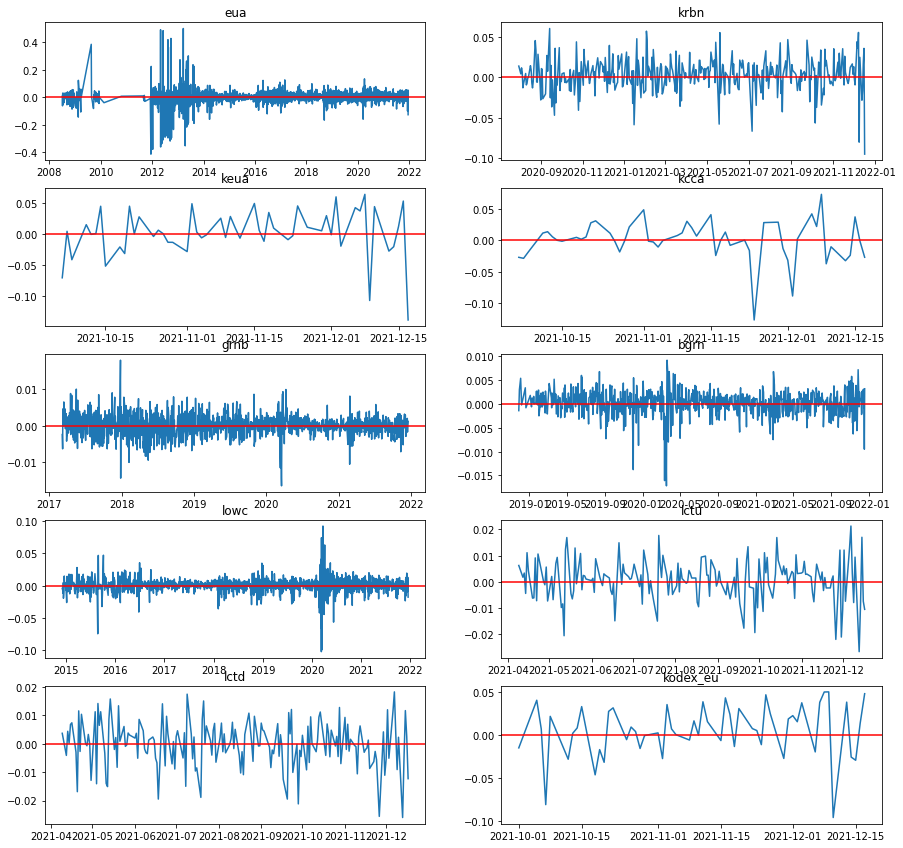

In [88]:
plt.figure(figsize =(15,30))
for i, carbon in enumerate(carbons):
    plt.subplot(10,2,i+1)
    plt.plot(carbon.Change)
    plt.title(cbns[i])
    plt.axhline(0, color='red')
plt.show()
# 전체

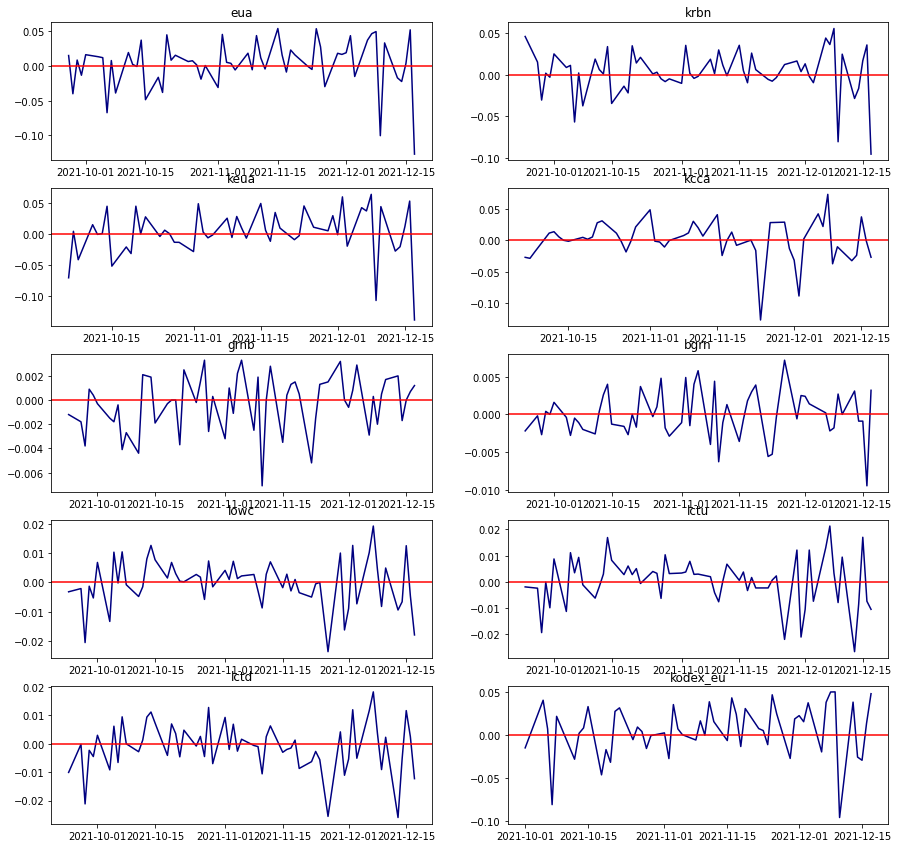

In [91]:
plt.figure(figsize =(15,30))
for i, carbon in enumerate(carbons):
    plt.subplot(10,2,i+1)
    plt.plot(carbon.Change[-60:], color='navy')
    plt.title(cbns[i])
    plt.axhline(0, color='red')
plt.show()
# 최근 60일

### 1-2. 누적수익률 패턴 시각화

In [120]:
for i, carbon in enumerate(carbons):
    for j in range(len(carbon)):
        carbon['return']= carbon.Close/carbon.Close[0]        

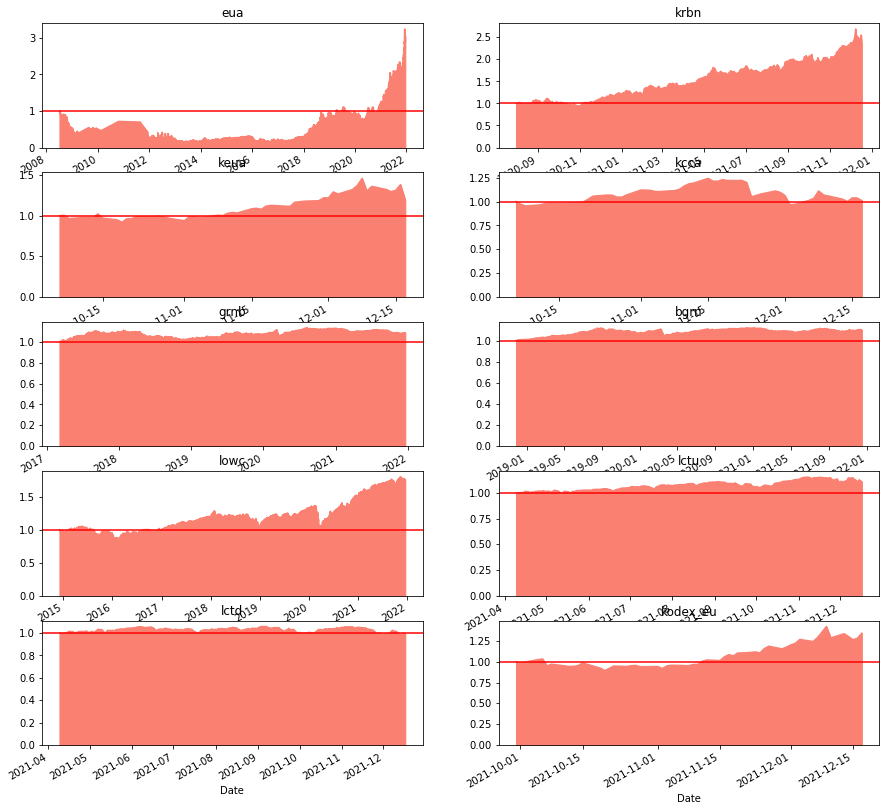

In [124]:
plt.figure(figsize =(15,30))
for i, carbon in enumerate(carbons):
    plt.subplot(10,2,i+1)
    carbon['return'].plot(kind='area', color='salmon')
    plt.title(cbns[i])
    plt.axhline(1, color='red')
plt.show()

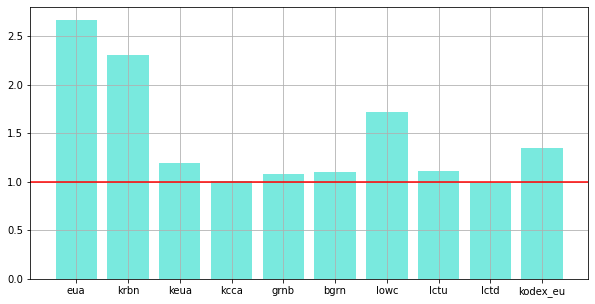

In [148]:
plt.figure(figsize =(10, 5))
return_all = {}
for i, carbon in enumerate(carbons):
    return_all[cbns[i]]= carbon.Close.iloc[-1]/carbon.Close.iloc[0]
plt.bar(return_all.keys(), return_all.values(), color = 'turquoise', alpha=0.7)
plt.axhline(1, color='red')
plt.grid()
plt.show()

In [132]:
# eua.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change', 'return',
       'return60'],
      dtype='object')

In [144]:
# for i, carbon in enumerate(carbons):
#     print(carbon.columns)

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')


### 1-3. 5일 이동평균 및 20일 이동평균 시각화

In [ ]:
# 전체 기간

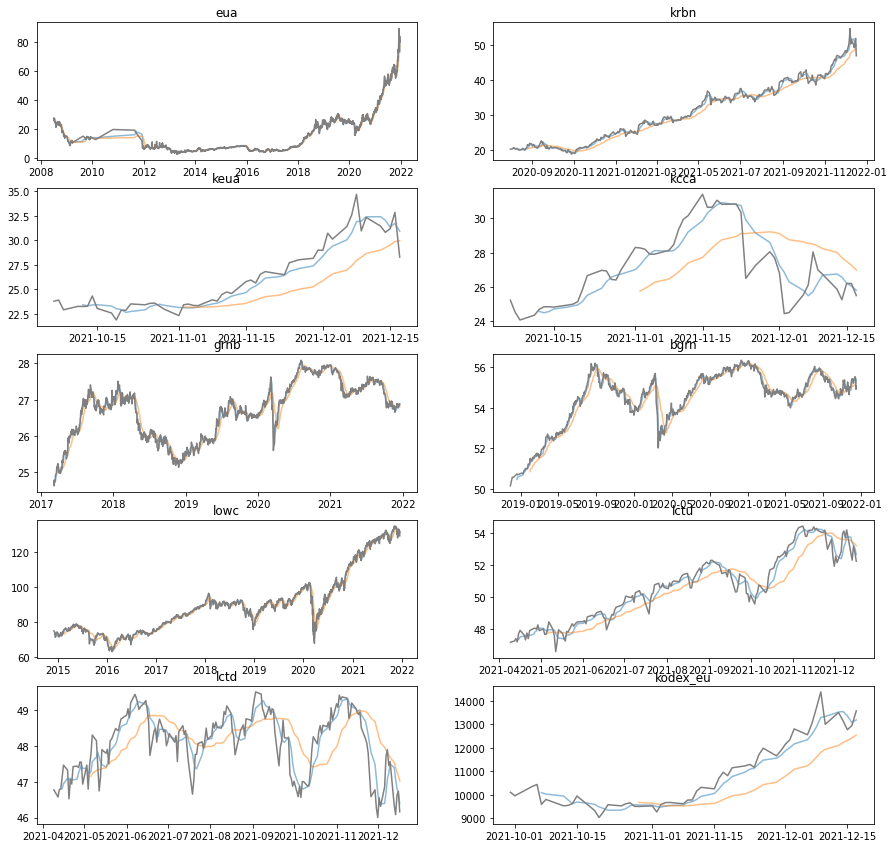

In [151]:
plt.figure(figsize =(15,30))

for i, carbon in enumerate(carbons):
    plt.subplot(10,2,i+1)

    carbon['5m'] = carbon.Close.rolling(5).mean()
    carbon['20m'] = carbon.Close.rolling(20).mean()
    
    plt.plot(carbon[['5m','20m']],alpha=0.5)
    plt.plot(carbon.Close, color='grey')

    plt.title(etfs_s[i])
plt.show()

In [ ]:
# 최근 60일

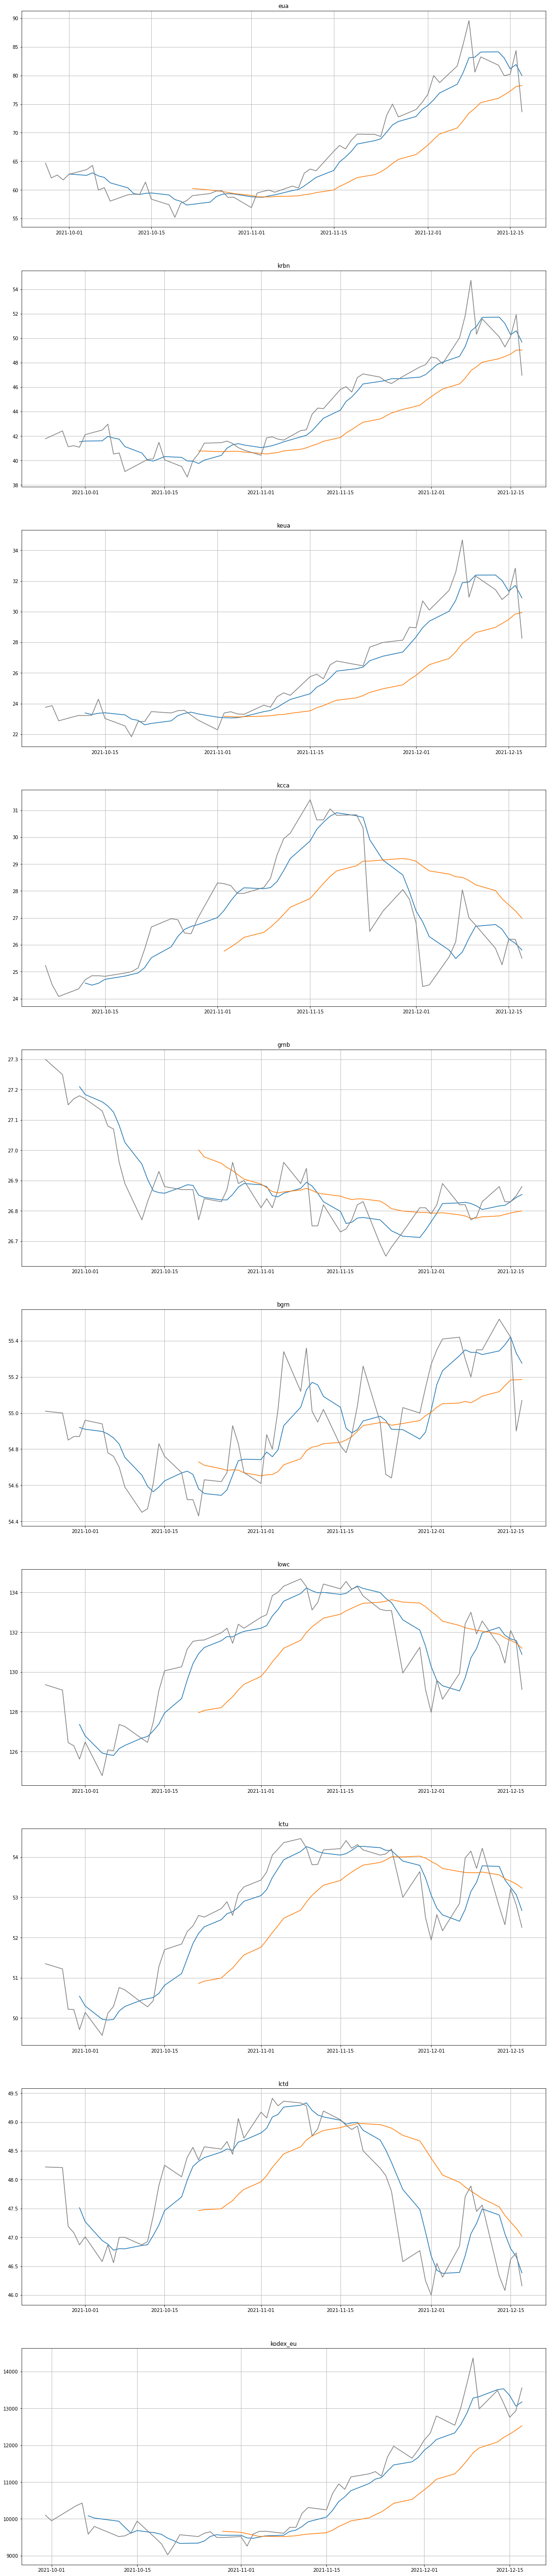

In [181]:
plt.figure(figsize =(20,100))

for i, carbon in enumerate(carbons):
    plt.subplot(10,1,i+1)

    carbon['5m60'] = carbon.Close[-60:].rolling(5).mean()
    carbon['20m60'] = carbon.Close[-60:].rolling(20).mean()
    
    plt.plot(carbon[['5m60','20m60']])
    plt.plot(carbon.Close[-60:], color='grey')

    plt.title(cbns[i])
    plt.grid()

plt.show()

- orange = 20일 평균, blue = 5일 평균, grey =해당일 종가
- 5일 이동평균이 20일 이동평균보다 커지는 지점: 매수 타이밍
- 5일 이동평균이 20일 이동평균보다 작아지는 지점: 매도 타이밍

### 1-4. MACD
- Moving Average Convergence Divergence)
- 신호, 평균, 확산을 통해 주가 추세의 강도, 방향, 모멤텀 및 지속 시간의 변화 표시
- 상승기 : MACD가 signal 위에 있을 때 
- 하락기 : MACD가 signal 아래 있을 대
- 매수신호: MACD가 signal선을 상향 돌파시(golden cross)
- 매도신호: MACD가 signal선을 하향 돌파시(dead cross)

In [178]:
for i, carbon in enumerate(carbons):
    
    carbon['ema_short'] = carbon.Close.ewm(12).mean()
    carbon['ema_long'] = carbon.Close.ewm(26).mean()
    carbon['MACD'] = carbon['ema_short'] - carbon['ema_long']
    carbon['signal'] = carbon['MACD'].ewm(9).mean()
    carbon['macdhist'] = carbon['MACD'] - carbon['signal']

<Figure size 1440x7200 with 0 Axes>

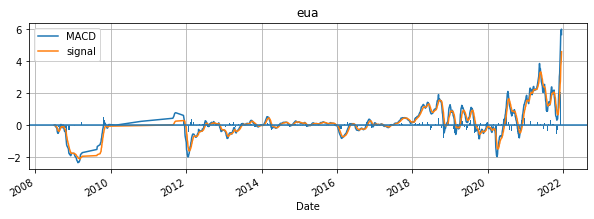

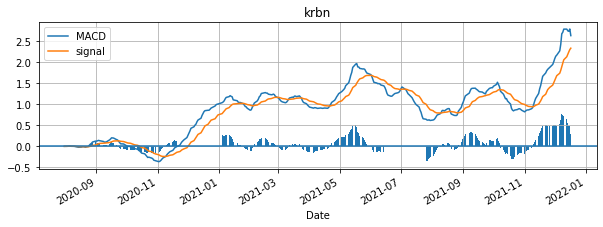

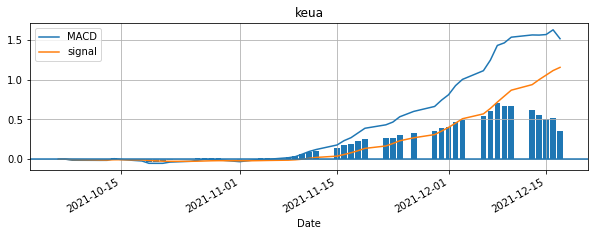

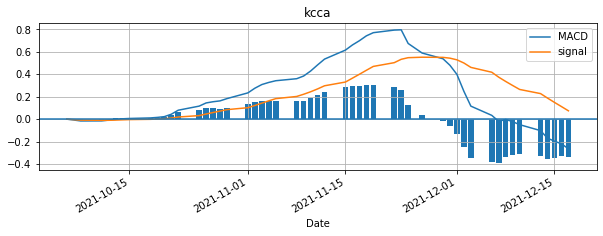

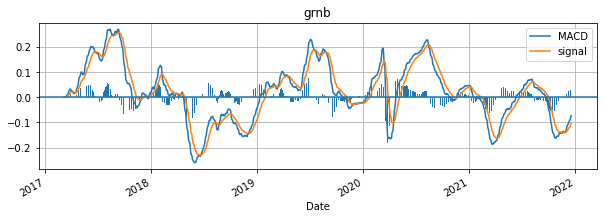

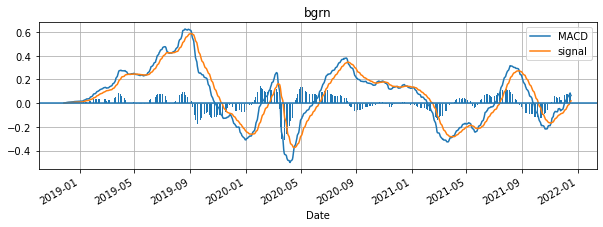

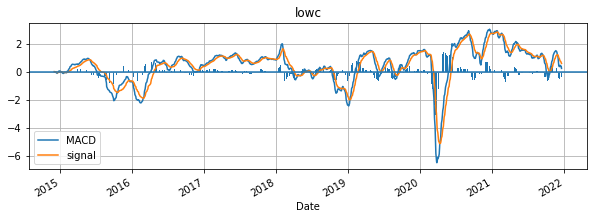

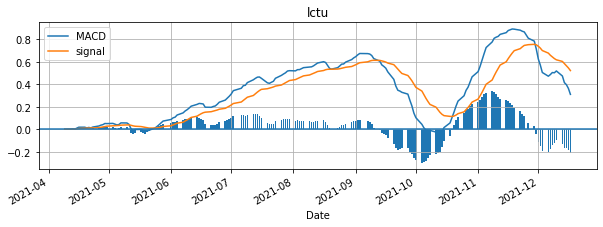

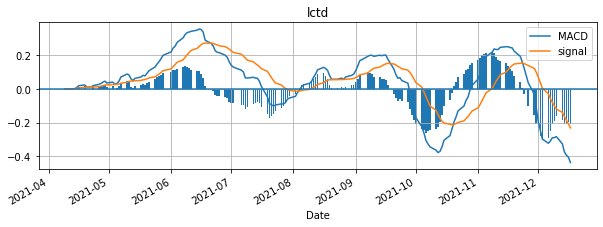

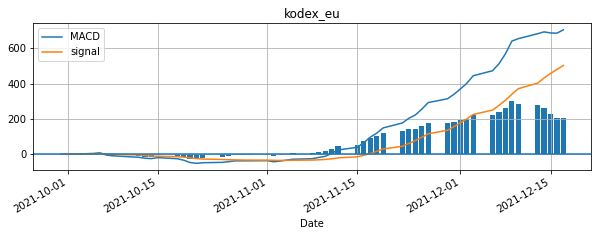

In [179]:
plt.figure(figsize =(20,100))

for i, carbon in enumerate(carbons):
#    plt.subplot(10,1,i+1)    
    carbon[['MACD', 'signal']].plot(figsize=(10,3))
    plt.axhline(0)
    plt.bar(carbon['macdhist'].index, carbon['macdhist'])

    plt.title(etfs_s[i])
    plt.grid()
    plt.show()

<Figure size 1440x7200 with 0 Axes>

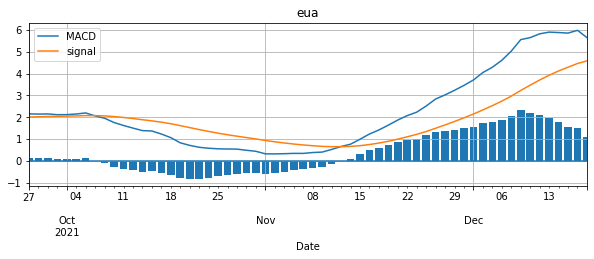

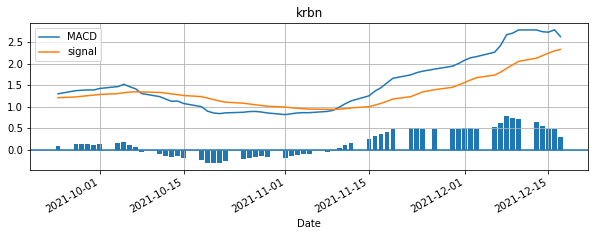

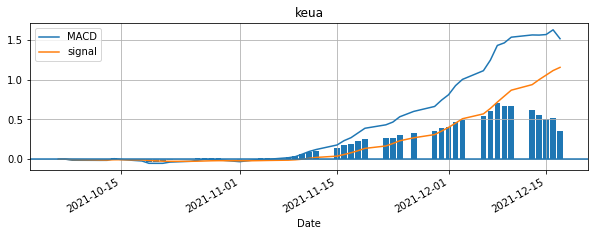

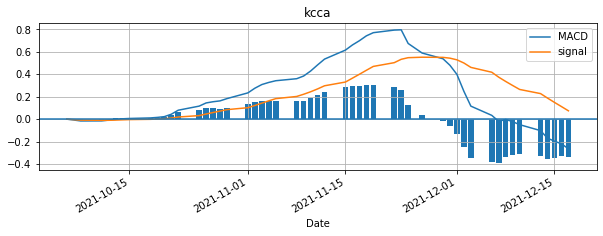

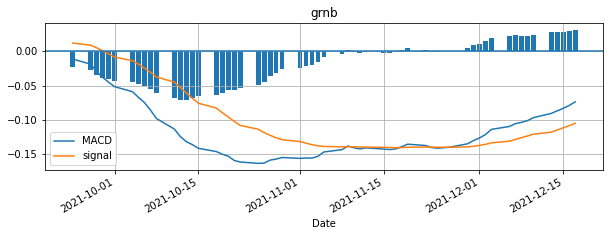

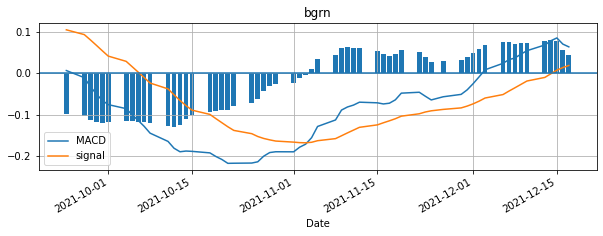

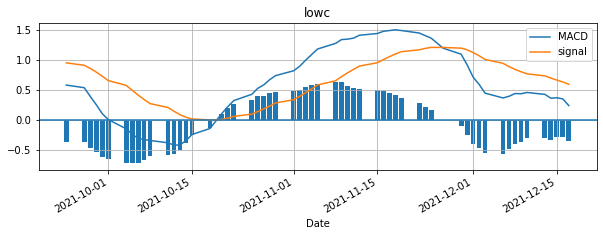

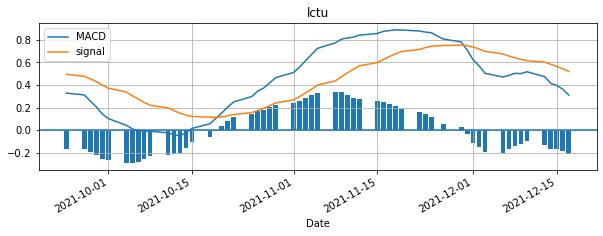

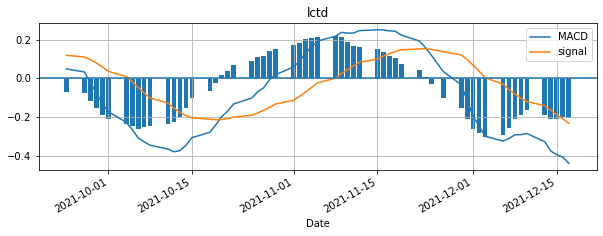

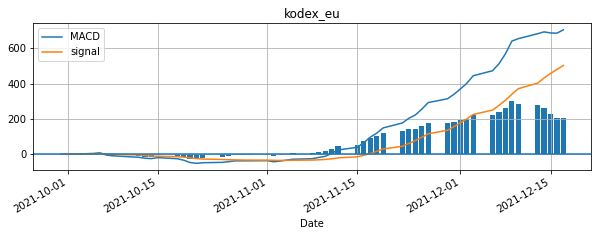

In [180]:
plt.figure(figsize =(20,100))

for i, carbon in enumerate(carbons):
#    plt.subplot(10,1,i+1)    
    carbon[['MACD', 'signal']][-60:].plot(figsize=(10,3))
    plt.axhline(0)
    plt.bar(carbon['macdhist'][-60:].index, carbon['macdhist'][-60:])

    plt.title(etfs_s[i])
    plt.grid()
    plt.show()

- eua 추종 종목은 이제 막 매수신호(11월 초- 중반)를 넘어섰음

In [182]:
#딥/머신러닝 진행중 accuracy 0.8 이하
#피쳐 추가중